# The Perceptron Algorithm used on the Iris Dataset

In this Jupyter Notebook we implement the perceptron algorithm on hte [iris_data_set](https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [1]:
using RDatasets
using Plots

In [2]:
#Import Dataset from RDatasets
iris = dataset("datasets", "iris")

# This says the tuple x such that the first entry comes from SepalLength array
# and sencond from iris.SW
x_data = [x for x in zip(iris.SepalLength[1:100], iris.SepalWidth[1:100])]

#y_data = [x for x in iris.Species[1:100]]
#We need numerical values so... 

# Assign numeric value to label
y_data = [iris.Species[i] == "setosa" ? 1 : -1 for i = 1:100]


100-element Array{Int64,1}:
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  ⋮
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1

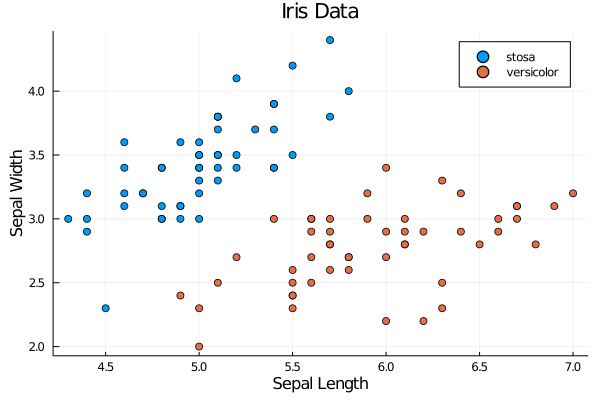

In [3]:
# Plot data
scatter(x_data[1:50],
    label = "stosa",
    xaxis = "Sepal Length",
    yaxis = "Sepal Width",
    title = "Iris Data")

# ! mark to modify plot
scatter!(x_data[51:100],
    label = "versicolor")

#Check if plot is linearly separable

The perceptron algorithm uses the sign function to update the weights... 

In [4]:
#weights is a 3 dimensional, x is 2 dimensional
function sign(weights, x)
    x̂ = [x[1], x[2], 1]
    return weights'x̂ > 0 ? 1 : -1
end

sign (generic function with 1 method)

In [5]:
function perceptron_update(weights, x, y)
    if sign(weights, x) != y
        weights += y*[x[1], x[2], 1.0]
    end
    return weights
end 

perceptron_update (generic function with 1 method)

In [6]:
function error(weights, feature_set, labels)
    return sum([sign(weights, feature_set[i]) != labels[i] ? 1 : 0 for i = 1:length(feature_set)])
end 


error (generic function with 1 method)

In [7]:
function perceptron_learning_algorithm(weights, feature_set, labels, ϵ)
    
    error_measures = []
    append!(error_measures, error(weights, feature_set, labels))
        
    weight_vector = []
    
    while error(weights, feature_set, labels) > ϵ
            for i = 1:length(feature_set)
                weights = perceptron_update(weights, feature_set[i], labels[i])
            end
            
            append!(weight_vector, weights)
            append!(error_measures, error(weights, feature_set, labels))
    end
    return weights, weight_vector, error_measures
end

perceptron_learning_algorithm (generic function with 1 method)

In [8]:
w, W, errors = perceptron_learning_algorithm(randn(3), x_data, y_data, 2)

([-27.76883672901497, 42.391069763439376, 13.151763157385247], Any[-3.1688367290149495, 0.8910697634393987, 0.15176315738524782, -5.06883672901495, 1.1910697634393985, 0.15176315738524782, -6.96883672901495, 1.4910697634393983, 0.15176315738524782, -8.868836729014951  …  12.151763157385247, -29.668836729014973, 39.79106976343938, 12.151763157385247, -30.368836729014973, 39.79106976343938, 12.151763157385247, -27.76883672901497, 42.391069763439376, 13.151763157385247], Any[50, 50, 50, 50, 50, 50, 50, 50, 50, 50  …  3, 15, 33, 40, 3, 14, 30, 24, 33, 1])

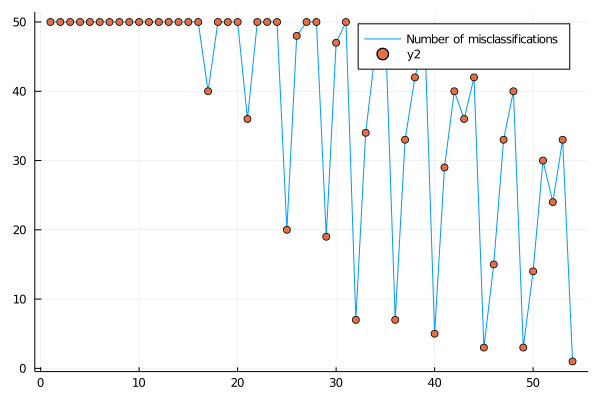

In [9]:
plot(errors,
    label= "Number of misclassifications")

scatter!(errors)

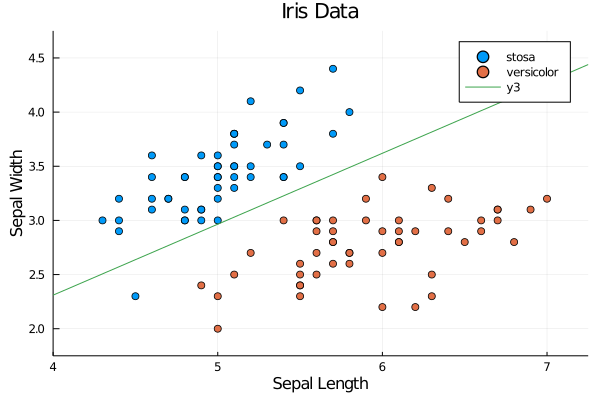

In [10]:
# Plot data
scatter(x_data[1:50],
    label = "stosa",
    xaxis = "Sepal Length",
    yaxis = "Sepal Width",
    title = "Iris Data")

# ! mark to modify plot
scatter!(x_data[51:100],
    label = "versicolor")

plot!(x-> (-x*w[1] - w[3])/w[2],
    xlim = (4.,7.25),
    ylim = (1.75, 4.75))


In [11]:
typeof(x_data)

Array{Tuple{Float64,Float64},1}

In [12]:
findmax(x_data)

((7.0, 3.2), 51)

In [13]:
x

LoadError: UndefVarError: x not defined

In [14]:
W

159-element Array{Any,1}:
  -3.1688367290149495
   0.8910697634393987
   0.15176315738524782
  -5.06883672901495
   1.1910697634393985
   0.15176315738524782
  -6.96883672901495
   1.4910697634393983
   0.15176315738524782
  -8.868836729014951
   1.7910697634393982
   0.15176315738524782
  -5.8688367290149515
   ⋮
 -29.568836729014972
  38.991069763439384
  12.151763157385247
 -29.668836729014973
  39.79106976343938
  12.151763157385247
 -30.368836729014973
  39.79106976343938
  12.151763157385247
 -27.76883672901497
  42.391069763439376
  13.151763157385247